Question A1. Continue your exercise on inspection of filters and feature maps from last week. Refer to above
provided sites to find code for feature map visualization. Feature maps are the output images from
each convolution layers.

A7. Design and implement a CNN network on your project data for your project goal. Refer to the
papers downloaded and pick a network to implement.

Found 741 images belonging to 8 classes.
Found 183 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 295s 13s/step - accuracy: 0.1225 - loss: 2.1790 - val_accuracy: 0.1475 - val_loss: 2.0634
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.1503 - loss: 2.0583 - val_accuracy: 0.1585 - val_loss: 2.0216
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - accuracy: 0.1711 - loss: 2.0091 - val_accuracy: 0.3552 - val_loss: 1.8302
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.3677 - loss: 1.7567 - val_accuracy: 0.4372 - val_loss: 1.6459
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.4294 - loss: 1.5700 - val_accuracy: 0.4590 - val_loss: 1.4925
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.4660 - loss: 1.5017 - val_accuracy: 0.4918 - val_loss: 1.4154
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.4711 - loss: 1.3768 - val_accuracy: 0.4481 - val_loss: 1.5267
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.5240 - loss: 1.3458 - val_accuracy: 0

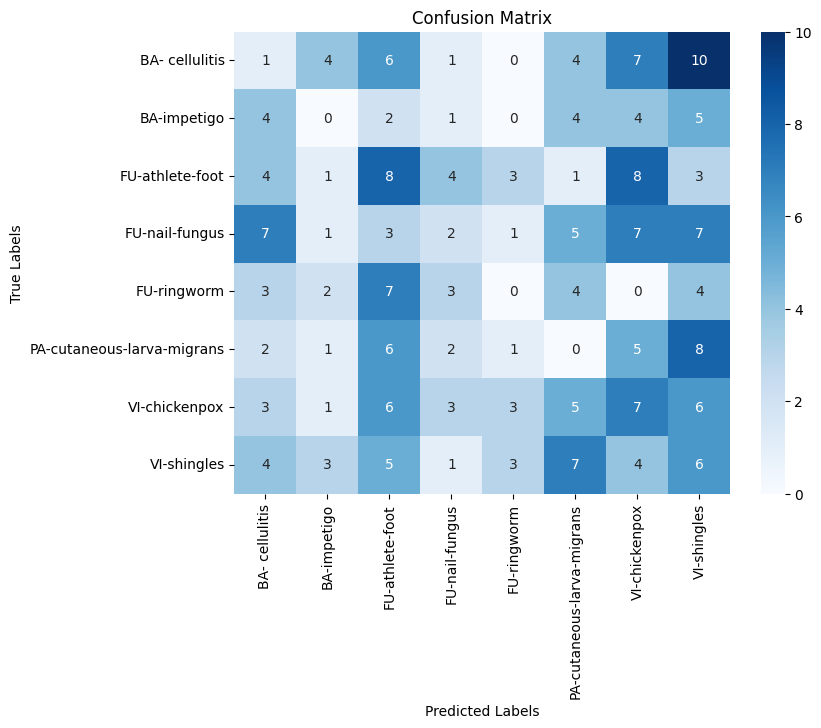

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Define dataset paths
train_dir = "/content/drive/MyDrive/skin-disease-datasaet/train_set"
test_dir = "/content/drive/MyDrive/skin-disease-datasaet/test_set"

# Image Parameters
img_size = (64, 64)  # Resize all images to 64x64
batch_size = 32

# Load images using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)  # 20% for validation
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Training data
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define CNN Model (Custom CNN)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Get predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = test_generator.classes  # True labels

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print("\nClassification Report:\n", report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2358 - loss: 2.1262 - val_accuracy: 0.6721 - val_loss: 1.1307
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6186 - loss: 1.1229 - val_accuracy: 0.7377 - val_loss: 0.8209
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7554 - loss: 0.7897 - val_accuracy: 0.8087 - val_loss: 0.6403
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8105 - loss: 0.5940 - val_accuracy: 0.8033 - val_loss: 0.6004
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8557 - loss: 0.4786 - val_accuracy: 0.7377 - val_loss: 0.6638
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8757 - loss: 0.4214 - val_accuracy: 0.8579 - val_loss: 0.5038
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9104 - loss: 0.3647 - val_accuracy: 0.8798 - val_loss: 0.4641
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9137 - loss: 0.3177 - val_accuracy: 0.8689 - val_loss:

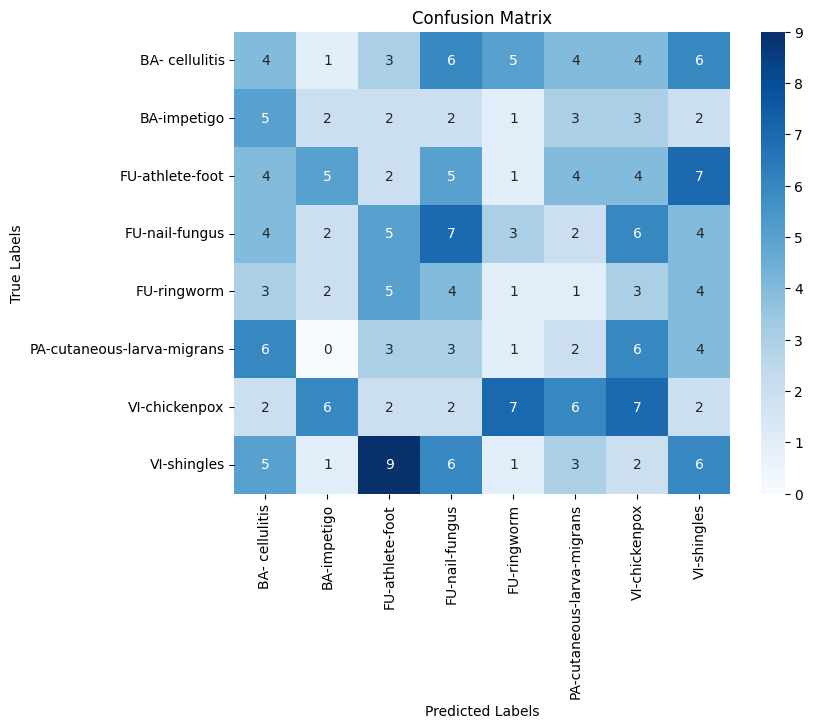

In [3]:
#VGG based model

# Define the new model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Get predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = test_generator.classes  # True labels

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print("\nClassification Report:\n", report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()